##                                     Sentiment Analysis for Text using ML

In [2]:
# Importing required packages 

import pandas as pd
import numpy as np
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import re
from bs4 import BeautifulSoup
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix,auc,roc_auc_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from scikitplot.metrics import plot_confusion_matrix
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
from sklearn.tree import DecisionTreeClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Srikanth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Srikanth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [95]:
#Importing CSV File

Food_Reviews = pd.read_csv("Reviews.csv")
Food_Reviews = Food_Reviews[:40000]
Food_Reviews

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
39995,39996,B00017LEY8,A2V2FL4XWQ3TU4,kes,4,4,5,1219968000,"Best popcorn, hands down","I've tried a wide variety of popcorns, and gen..."
39996,39997,B00017LEY8,AHNWS8JUU0D48,"Jack Parker ""photographer""",3,3,5,1223251200,BEST EVER,"I am unable to buy ""hulless"" popcorn in my are..."
39997,39998,B00017LEY8,A36G9KA8FGCVS1,John ONeal,2,2,5,1286755200,ALL popcorn has hulls,"Even ""no hull"" popcorn has hulls. It has to s..."
39998,39999,B00017LEY8,A1DCZ61SUGL12H,Shayrul,2,2,4,1281830400,Not for air poppers,"When I bought this popcorn, it was because Ama..."


In [4]:
Food_Reviews.count()

Id                        40000
ProductId                 40000
UserId                    40000
ProfileName               39998
HelpfulnessNumerator      40000
HelpfulnessDenominator    40000
Score                     40000
Time                      40000
Summary                   39999
Text                      40000
dtype: int64

In [5]:
Food_Reviews.nunique()

Id                        40000
ProductId                  4875
UserId                    33073
ProfileName               30707
HelpfulnessNumerator         99
HelpfulnessDenominator      105
Score                         5
Time                       2424
Summary                   31819
Text                      37441
dtype: int64

## Exploratory Data Analysis and Feature Engineering

In [6]:
# Lets convert our sccores to three labels 0 -> negative(score<3), 1 -> Positive(score>3), 2 -> neutral(score==3)

def label(x):
    if x<3:
        return 0
    elif x>3:
        return 1
    elif x==3:
        return 2

In [7]:
Food_Reviews["Score"]=Food_Reviews["Score"].map(label)
Food_Reviews

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
39995,39996,B00017LEY8,A2V2FL4XWQ3TU4,kes,4,4,1,1219968000,"Best popcorn, hands down","I've tried a wide variety of popcorns, and gen..."
39996,39997,B00017LEY8,AHNWS8JUU0D48,"Jack Parker ""photographer""",3,3,1,1223251200,BEST EVER,"I am unable to buy ""hulless"" popcorn in my are..."
39997,39998,B00017LEY8,A36G9KA8FGCVS1,John ONeal,2,2,1,1286755200,ALL popcorn has hulls,"Even ""no hull"" popcorn has hulls. It has to s..."
39998,39999,B00017LEY8,A1DCZ61SUGL12H,Shayrul,2,2,1,1281830400,Not for air poppers,"When I bought this popcorn, it was because Ama..."


In [8]:
# Lets check the data for duplicate values

Food_Reviews[Food_Reviews[["UserId","ProfileName","Time","Text"]].duplicated()]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
29,30,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1,1,1,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,1,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
1973,1974,B0017165OG,A2EPNS38TTLZYN,tedebear,0,0,2,1312675200,Pok Chops,The pork chops from Omaha Steaks were very tas...
2309,2310,B0001VWE0M,AQM74O8Z4FMS0,Sunshine,0,0,0,1127606400,Below standard,Too much of the white pith on this orange peel...
2323,2324,B0001VWE0C,AQM74O8Z4FMS0,Sunshine,0,0,0,1127606400,Below standard,Too much of the white pith on this orange peel...
...,...,...,...,...,...,...,...,...,...,...
39976,39977,B001TZJ3OE,A3908E1G8IL52G,Jessica Ztardust,1,2,1,1312243200,Highly Addicting!,I did not purchase this product off of Amazon....
39977,39978,B001TZJ3OE,AF1PV3DIC0XM7,Robert Ashton,1,2,1,1081555200,Classic Condiment,Mae Ploy Sweet Chili Sauce is becoming a stand...
39978,39979,B001TZJ3OE,A1VTHOTQFPRFVT,jumperboy,0,1,2,1301961600,"Just Okay, Too Sweet",I was excited to try this sauce based on the r...
39979,39980,B001TZJ3OE,AAJ1IYOUIHWF,D. Sun,1,11,2,1243036800,Too much,These are very large bottles. It is a good dip...


In [9]:
# So, there are duplicates in our data. Lets drop the duplicate entries.

Food_Reviewsdf = Food_Reviews.drop_duplicates(subset={"UserId","ProfileName","Time","Text"},keep='first')

In [10]:
# Now lets check for the missing values.
## We can see that Score & Text columns do not have null values.
### Here we can consider as - Text is our Feature and Score is our Label. So from now on we deal only with Text and Score columns

Food_Reviewsdf.isnull().any()

Id                        False
ProductId                 False
UserId                    False
ProfileName                True
HelpfulnessNumerator      False
HelpfulnessDenominator    False
Score                     False
Time                      False
Summary                    True
Text                      False
dtype: bool

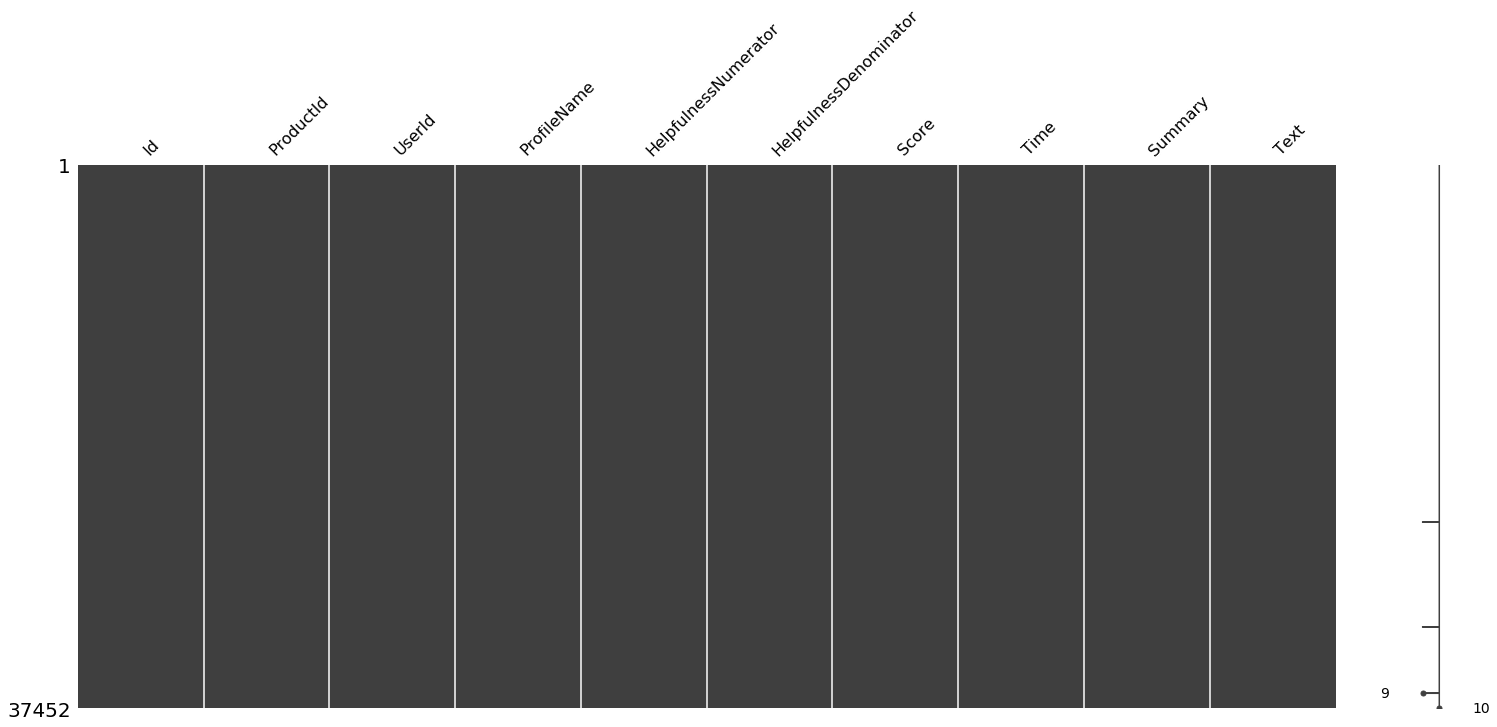

In [12]:
#We have no missing values.
#To confirm, we can visualize missing values using missingno module.

%matplotlib inline

import missingno as msno
msno.matrix(Food_Reviewsdf)

In [13]:
Food_Reviewsdf["Score"].value_counts()

1    28875
0     5597
2     2980
Name: Score, dtype: int64

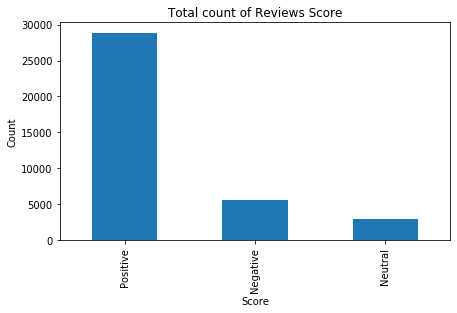

In [96]:
#Total count of Reviews Score

Food_Reviewsdf["Score"].replace({0:'Negative',1:'Positive', 2:'Neutral'}).value_counts().plot(kind='bar',figsize=(7,4))
plt.title("Total count of Reviews Score");
plt.xlabel("Score");
plt.ylabel("Count");

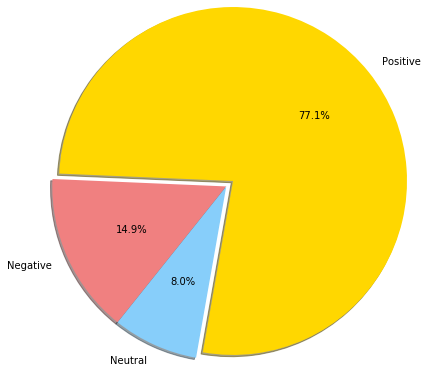

In [101]:
# Pie Chart to show the Label distribution

labels = reviews_df["Score"].replace({0:'Negative',1:'Positive', 2:'Neutral'}).unique()
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0)  # explode 1st slice

plt.pie(reviews_df["Score"].value_counts(),autopct='%1.1f%%',radius=2,  explode=explode,labels=labels,colors=colors, shadow=True, startangle=260)
plt.show()

From the above bar plot and pie we can clearly see that our data is imbalanced biasing towards to positive class(1) -> 77.1%.

# Pre-Processing of text

In [23]:
reviews_df=Food_Reviewsdf[["Text","Score"]]

In [24]:
reviews_df.head()

,Text,Score
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,1
3,If you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,1


In [25]:
 print(stop_words)

{'here', "needn't", 'more', 'of', 'there', 'what', 'theirs', 'having', 'hasn', 'those', 've', 'just', 'hadn', 'same', 'doing', 'against', 'are', 'me', 'which', 're', 'm', "isn't", 'the', "it's", 'yourself', 'each', 'mightn', 'any', 'it', 'some', 'weren', 'mustn', 'further', 'through', 'being', 'itself', 'very', 'we', 'then', "didn't", 'these', 'only', 'from', "shan't", 'his', 'but', 'd', 'been', 'have', 'to', 'such', 'their', 'was', 'and', 'about', 'no', 'o', 'can', 'out', 'has', 'below', "aren't", 'yours', 'yourselves', 'ourselves', 'him', 'didn', "hasn't", 'up', 'before', 'myself', 'so', 'as', 'our', "that'll", 'is', 'doesn', 'at', 's', 'does', 'on', 'ours', 'needn', "you're", "shouldn't", 'who', "you'll", 'an', 'whom', 'between', 'will', 'shan', 'all', 'she', 'other', "should've", 'with', 'ain', 'for', 'nor', 'wouldn', "don't", 'did', 'than', 'now', 'both', "couldn't", 'few', 'am', 'under', 'this', 'in', 't', "mustn't", 'should', 'were', 'a', 'own', 'he', 'above', 'i', 'where', "wou

In [26]:
stop_words.remove("not")

In [27]:
#The reviews we are given have a lot of unnecessary characters, some regular common words which don’t really add anything to the model’s performance. We need to eliminate such factors prior to modeling.
#(i) Remove all HTML tags using Beautiful soap
#(ii) Remove all special characters and numbers using re.
#(iii) Tokenize the reviews and convert to lower case
#(iv) Perform stemming using PorterStemmer
#(v) Remove all stop words.

In [28]:
def text_Preprocessing(reviews):
    pre_processed_reviews=[]
    for review in tqdm(reviews):
        review= BeautifulSoup(review,'lxml').getText()#remove html tags
        review=re.sub('[^A-Za-z]+',' ',review) #remove special chars
        review=re.sub("n't","not",review)
        review=word_tokenize(str(review.lower())) #tokenize the reviews into word tokens
        review=' '.join(PorterStemmer().stem(word) for word in review if word not in stop_words)
        pre_processed_reviews.append(review.strip())
    return pre_processed_reviews

In [29]:
preprocessed_reviews=text_Preprocessing(reviews_df["Text"])

100%|██████████| 37452/37452 [01:09<00:00, 540.16it/s]


In [30]:
# Here we  have a Numpy array consisting of a list of lists

preprocessed_reviews[72]

'buyer bewar pleas sweeten not everybodi maltitol alcohol sugar undigest bodi know short time consum one unsuspect mani not digest extrem intestin bloat cramp massiv amount ga person experi nausea diarrhea headach also experienc learn lesson hard way year ago fell love sugar free chocol suzann sommer use sell thought found sugar free chocol nirvana first tast bliss short live terribl side effect maltitol kick discomfort unlik anyth ever felt blew like balloon pain abdomin cramp symptom pass unpleas though hard believ low calori sweeten could culprit symptom gone stop eat chocol hunch someth maltitol unfortun confirm year later purchas delici sugar free popcorn local market tast amaz look label wonder could possibl make yummi new sugarfre treat tast good heart sank follow littl asterisk next sugarfre sweeten bottom label read maltitol tini littl letter thank good eaten littl still end side effect much shorter durat peopl use maltitol heart content other like bad reaction case like not m

In [31]:
# We create a pandas dataframe from numpy array

preprocessed_reviews = pd.DataFrame({'text':preprocessed_reviews,'sentiment':reviews_df.Score})

In [32]:
preprocessed_reviews

,text,sentiment
0,bought sever vital can dog food product found ...,1
1,product arriv label jumbo salt peanut peanut a...,0
2,confect around centuri light pillowi citru gel...,1
3,look secret ingredi robitussin believ found go...,0
4,great taffi great price wide assort yummi taff...,1
...,...,...
39995,tri wide varieti popcorn gener find qualiti br...,1
39996,unabl buy hulless popcorn area first time sinc...,1
39997,even hull popcorn hull contain moistur kernel ...,1
39998,bought popcorn amazon recommend least show air...,1


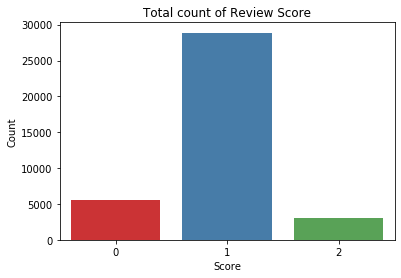

1    28875
0     5597
2     2980
Name: sentiment, dtype: int64

In [33]:
d = sns.countplot(x="Score", data=Food_Reviewsdf, palette="Set1")
d.axes.set_title("Total count of Review Score")
d.set_xlabel("Score")
d.set_ylabel("Count")
plt.show()
preprocessed_reviews.sentiment.value_counts()

# Text Featurization

In [34]:
# We split the data to test & training

reviews_train,reviews_test,sentiment_train,sentiment_test = train_test_split(preprocessed_reviews.text,preprocessed_reviews.sentiment)
print(reviews_train.shape,reviews_test.shape)
print(sentiment_train.shape,sentiment_test.shape)

(28089,) (9363,)
(28089,) (9363,)


In [35]:
#Applying TF-IDF

tfidf_model=TfidfVectorizer(ngram_range=(1,2),min_df=10, max_features=10000)
tfidf_model.fit(reviews_train,sentiment_train)
reviews_train_tfidf=tfidf_model.transform(reviews_train)
reviews_test_tfidf=tfidf_model.transform(reviews_test)


In [36]:
print(tfidf_model.get_feature_names())

['abil', 'abl', 'abl buy', 'abl drink', 'abl eat', 'abl enjoy', 'abl find', 'abl get', 'abl make', 'abl order', 'abl purchas', 'abl use', 'absolut', 'absolut best', 'absolut delici', 'absolut favorit', 'absolut love', 'absolut wonder', 'absorb', 'absorb flavor', 'abund', 'acai', 'accept', 'access', 'accid', 'accident', 'accompani', 'accomplish', 'accord', 'accord direct', 'account', 'accur', 'accustom', 'acerola', 'ach', 'achiev', 'acid', 'acid coffe', 'acid not', 'acid reflux', 'acid tast', 'acquir', 'acquir tast', 'across', 'act', 'act like', 'action', 'activ', 'actual', 'actual eat', 'actual good', 'actual like', 'actual look', 'actual prefer', 'actual tast', 'actual use', 'actual work', 'ad', 'ad bit', 'ad bonu', 'ad flavor', 'ad littl', 'ad milk', 'ad salt', 'ad sugar', 'ad sweeten', 'ad water', 'adapt', 'add', 'add anyth', 'add bit', 'add cup', 'add extra', 'add flavor', 'add hot', 'add littl', 'add lot', 'add milk', 'add much', 'add nice', 'add one', 'add salt', 'add sugar', 'ad

In [37]:
tfidf_df=pd.DataFrame(reviews_train_tfidf.toarray(),columns=tfidf_model.get_feature_names(),index=reviews_train.index)
tfidf_df

,abil,abl,abl buy,abl drink,abl eat,abl enjoy,abl find,abl get,abl make,abl order,...,zing,zip,zip lock,zipfizz,ziploc,ziplock,ziplock bag,ziwipeak,zuke,zuke hip
18039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# Lets checkout the top features
top_features=sorted(zip(tfidf_model.idf_,tfidf_model.get_feature_names()))
top15=top_features[:15]

In [39]:
top15

[(1.9605078865424805, 'not'),
 (2.1065827367107683, 'like'),
 (2.161571424014832, 'tast'),
 (2.2910812765498845, 'good'),
 (2.3352859061560416, 'love'),
 (2.418785189842228, 'great'),
 (2.4303254865810944, 'flavor'),
 (2.4331568721251187, 'one'),
 (2.4943879305851793, 'tri'),
 (2.4977252399996974, 'product'),
 (2.5297512667191056, 'use'),
 (2.6495703974796463, 'get'),
 (2.7160253978288837, 'make'),
 (2.744954695279855, 'would'),
 (2.844984515264254, 'buy')]

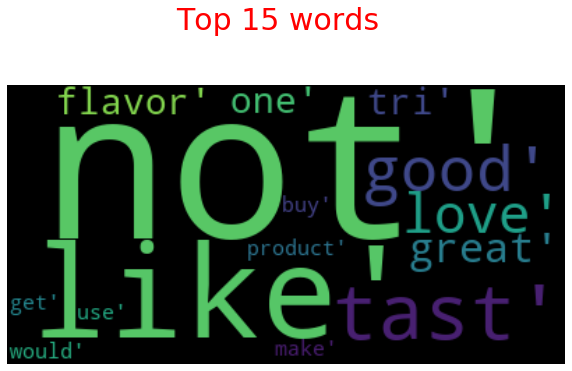

In [42]:
from wordcloud import WordCloud
plt.figure(figsize=(10,8))
wc = WordCloud(background_color="black",max_font_size=150, random_state=42)
wc.generate(str(top15))
plt.imshow(wc, interpolation='bilinear')
plt.suptitle('Top 15 words', size=30, y=0.88,color="r")
plt.axis("off")
plt.savefig("top15_words.png")
plt.show()

### Resampling the minority class

In [92]:
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

In [93]:
sm = SMOTE(sampling_strategy='auto', random_state=7)

oversampled_trainX, oversampled_trainY = sm.fit_resample(reviews_train_tfidf,sentiment_train)
oversampled_trainY.value_counts()

2    21664
1    21664
0    21664
Name: sentiment, dtype: int64

# Modelling

### Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression 
lr=LogisticRegression(max_iter=1000)
lr.fit(reviews_train_tfidf,sentiment_train)
lr_predict=lr.predict(reviews_test_tfidf)
plain_lr_f1=f1_score(sentiment_test,lr_predict,average='weighted')
plain_lr_f1

0.8250530331884618

In [75]:
from scikitplot.metrics import plot_confusion_matrix

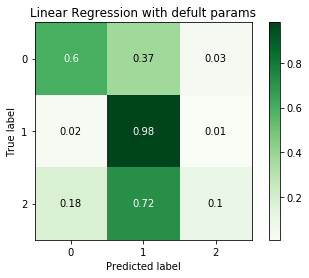

In [76]:
plot_confusion_matrix(sentiment_test,lr_predict,normalize=True,cmap="Greens")
plt.title("Linear Regression with defult params")
plt.show()